On charge les biblio 

In [28]:
import os 
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

Chargement de l'ensemble de données MNIST

In [29]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [47]:
len(train_images)

60000

In [30]:
# train_images = train_images[:10]
# train_labels = train_labels[:10]
# test_images = test_images[:10]
# test_labels = test_labels[:10]

Structure de notre data et affichage de la première image d'entraînement

Nombre d'images d'entraînement: 60000
Nombre d'images de test: 10000
Forme d'une image d'entraînement: (28, 28)
Étiquette d'une image d'entraînement: 5


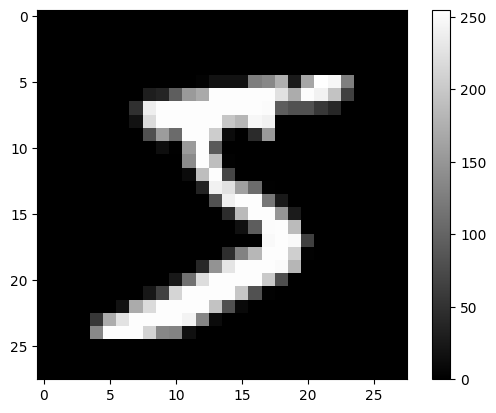

In [31]:
print("Nombre d'images d'entraînement:", len(train_images))
print("Nombre d'images de test:", len(test_images))
print("Forme d'une image d'entraînement:", train_images[0].shape)
print("Étiquette d'une image d'entraînement:", train_labels[0])
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

Normalisation de la taille des images ([0:255]-> [0,1])

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

On définit notre modèle CNN

In [33]:
# model = models.Sequential([
#     # Couche de convolution 2D avec 32 filtres, une taille de fenêtre de 3x3 et une fonction d'activation ReLU
#     layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     # Couche de pooling avec une taille de fenêtre de 2x2
#     layers.Dense(10, activation='softmax')
# ])

In [34]:
model = models.Sequential([
    # Couche de convolution 2D avec 32 filtres, une taille de fenêtre de 3x3 et une fonction d'activation ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Couche de pooling avec une taille de fenêtre de 2x2
    layers.MaxPooling2D((2, 2)),
    # Couche de convolution 2D avec 64 filtres et une fonction d'activation ReLU
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Couche de pooling avec une taille de fenêtre de 2x2
    layers.MaxPooling2D((2, 2)),
    # Couche de flattening pour aplatir la sortie en un vecteur
    layers.Flatten(),
    # Couche dense avec 64 neurones et une fonction d'activation ReLU
    layers.Dense(64, activation='relu'),
    # Couche de sortie avec 10 neurones (un pour chaque classe) et une fonction d'activation softmax
    layers.Dense(10, activation='softmax')
])

Compilation du modèle

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Entraînement du modèle

In [37]:
model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=5, validation_data=(test_images.reshape(-1, 28, 28, 1), test_labels))


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0328 - val_accuracy: 0.9910
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0112 - accuracy: 0.9962 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.0303 - val_accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.0455 - val_accuracy: 0.9900
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0340 - val_accuracy: 0.9913


In [38]:
import tensorflow as tf

# Vérifiez si une GPU est disponible
if tf.config.list_physical_devices('GPU'):
    print("GPU est disponible et activé.")
else:
    print("Aucun GPU disponible. TensorFlow utilise le CPU.")


Aucun GPU disponible. TensorFlow utilise le CPU.


Évaluation du modèle

In [39]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1),  test_labels, verbose=2)
print('\nAccuracy on test data:', test_acc)

313/313 - 1s - loss: 0.0340 - accuracy: 0.9913 - 564ms/epoch - 2ms/step

Accuracy on test data: 0.9912999868392944


In [40]:
model.save('my_model.h5')
loaded_model = load_model('my_model.h5')

/home/simedtak/Desktop/projects/IA/Classification_d_images/env311/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prediction de l'image

In [50]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Charger le modèle pré-entraîné
loaded_model = tf.keras.models.load_model('my_model.h5')

# Chemin vers la nouvelle image
new_image_path = 'Images_to_predict/4.png'

# Ouvrir l'image avec PIL (Pillow)
new_image = Image.open(new_image_path)

# Redimensionner l'image à 28x28 pixels
new_image = new_image.resize((28, 28))

# Convertir l'image en niveaux de gris (si elle ne l'est pas déjà)
new_image = new_image.convert('L')

new_image.show()

# Convertir l'image en tableau NumPy
new_image_array = np.array(new_image)

# Normaliser les valeurs de pixels
new_image_array = new_image_array.astype('float32') / 255.0

# Redimensionner pour correspondre à la forme d'entrée du modèle
new_image_array = new_image_array.reshape(1, 28, 28, 1)

# Faire des prédictions sur la nouvelle image
predictions = loaded_model.predict(new_image_array)

# Trouver la classe prédite
predicted_class = np.argmax(predictions)

# Assumant que 'class_labels' est une liste d'étiquettes de classe
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Mapper la classe prédite à une étiquette
predicted_label = class_labels[predicted_class]

print(f'Classe prédite : {predicted_class} ({predicted_label})')


1/1 [==============================] - 0s 40ms/step
Classe prédite : 9 (9)
